# Lab: Linear Regression
# ISLR Chapter 3.6 Lab: Linear Regression

In this lab, we will go over how to do linear regression using `R`.

## Libraries

Before starting, we use the `library()` function to load groups of functions and data sets that are not included in the base `R` distribution. In this lab, we'll use the `MASS` package, which is a large collection of data sets and functions, as well as the `ISLR` package, which includes the data sets associated with the book. Note that if we ever want to use any of the `ISLR` data sets individually or analyze them using a language other than `R`, we may download CSV files for each set from the book's [website](http://www.statlearning.com) under the "Data Sets and Figures" link.

In [3]:
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("ISLR", repos='http://cran.us.r-project.org')

library(MASS)
library(ISLR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Note that we might need to install the `ISLR` package on our computer if the above command to load the `ISLR` library gives an error. There are a number of ways to do this. Since I personally am using [Anaconda](http://www.anaconda.com), I used the Anaconda Navigator application to install the package by searching for the `r-islr` package under the Environments tab.

Now that we've loaded the `MASS` and `ISLR` libraries, we can use them to start performing some linear regression. For convenience, I will use the `Boston` data set which comes with the `MASS` library.

## Simple linear regression

As we saw in the third applied exercise from Chapter 2, one of the factors in the `Boston` data set is `medv`, which records the median house value for 506 tracts of land around Boston. To start with, we'll try to predict `medv` using the other factors, such as `rm` (average number of rooms per house), `age` (percent of owner-occupied homes built prior to 1940), and `lstat` (percent of low socioeconomic households). First, we'll fix take a look at the overall data set and then a look at their names.

In [4]:
head(Boston)
names(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

As usual, if we wish to look at the built-in documentation for this data set, we can type `?Boston`.

First, we'll use the `lm()` function to fit a simple linear regression model using `medv` as the response and `lstat` as the predictor. The basic syntax is `lm(y~x, data)`, where `y` is the response variable, `x` is the predictor variable, and `data` is the data set in which these two variables are kept. If we wish to save ourselves some typing, we can attach the data set and equivalently use `lm(y~x)`, assuming both `x` and `y` are variables that have been attached.

In [5]:
lm.fit = lm(medv~lstat, data = Boston)

To see some basic information about the model, we can simply access `lm.fit`.

In [6]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


This tells us that the regression line takes the form $y = -0.95x + 34.55$, where $y$ is the response `medv` and $x$ is the predictor `lstat`. If we want more detailed information, such as the p-values and standard errors for the coefficients, as well as the $R^2$ and $F$-statistic values for the model, we use `summary(lm.fit)`.

In [7]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


There are other pieces of information stored in `lm.fit`, which we can learn more about by using the `names()` function.

In [8]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

While we could access these quantities directly by name, such as `lm.fit$coefficients`, for example, it is safer to use the corresponding extractor functions instead. In the example of `lm.fit$coefficients`, we'd use `coef()` for safer access.

In [9]:
lm.fit$coefficients

(Intercept)       lstat 
 34.5538409  -0.9500494

In [10]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

The `confint()` command lets us view confidence intervals for the coefficient estimates. The default is to return a 95% confidence interval, though this can be altered using the `level` parameter.

First we produce 95% confidence intervals for the coefficient estimates.

In [11]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Next we product 99% confidence intervals for the coefficient estimates.

In [12]:
confint(lm.fit, level = 0.99)

,0.5 %,99.5 %
(Intercept),33.099101,36.0085810
lstat,-1.050199,-0.8498995


We can also produce confidence intervals and prediction intervales for the prediction of `medv` for a given value of `lstat` by using the `predict()` function. Similar to `confint()`, the default confidence/prediction level for `predict()` is 95%, though this again can be altered using the `level` parameter.

First we produce 95% confidence intervals for the predicted `medv` value using `lstat` values of 5, 10, and 15.

In [13]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), 
        interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


Next we produce 99% confidence intervals for the predicted values.

In [14]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), 
        interval = "confidence", level = 0.99)

,fit,lwr,upr
1,29.80359,28.75578,30.85141
2,25.05335,24.29107,25.81562
3,20.30310,19.55096,21.05524


Now we produce 95% and 99% prediction intervals for the predicted values of `medv`, again using `lstat` values of 5, 10, and 15.

In [15]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), 
        interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


In [16]:
predict(lm.fit, data.frame(lstat = c(5, 10, 15)), 
        interval = "prediction", level = 0.99)

,fit,lwr,upr
1,29.80359,13.697884,45.90930
2,25.05335,8.963690,41.14300
3,20.30310,4.213921,36.39228


Looking at the intervals, we can see that a 95% confidence interval for the predicted value of `medv` using an `lstat` value of 10 is (24.474, 25.632), while the corresponding 95% prediction interval is (12.828, 32.279). Both intervals are centered around the same point, the predicted value for `medv` of 25.053, but the prediction interval is much wider.

Now that we've computed the least squares regression line, we can plot it alongside `medv` and `lstat` using the `plot()` and `abline()` functions.

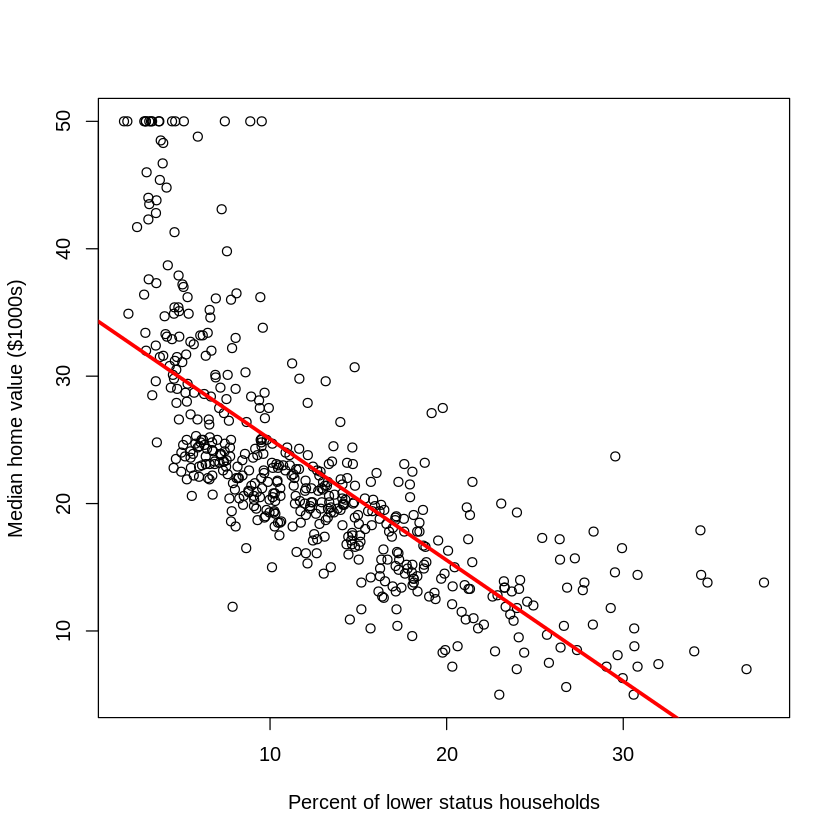

In [17]:
plot(Boston$lstat, Boston$medv, xlab = "Percent of lower status households", ylab = "Median home value ($1000s)")
abline(lm.fit, lwd=3, col = "red")

From the scatter plot, we can see that there is some evidence that the relationship between `lstat` and `medv` is non-linear. We'll take a look at this a little later in the lab.

When using `abline()` to draw the regression line, we specifed two optional parameters to make it easer to see. The `lwd = 3` parameter increases the width of the line by a factor of three, while the `col = "red"` parameter changed the color of the line from black to red. Another parameter is `pch`, which can be used to create different plotting symbols.

We can also use `abline(a, b)` to draw any line with intercept `a` and slope `b`. In other words, `abline(a, b)` draws lines of the form $y = a + bx$. Before moving on, here are some ways we can play around with the different options.

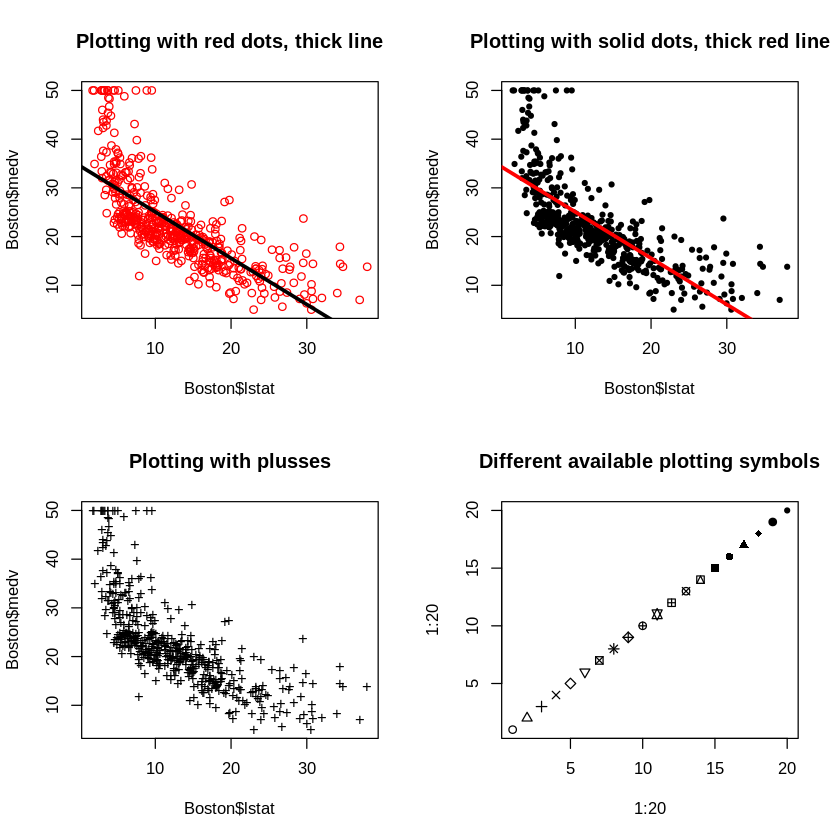

In [18]:
par(mfrow = c(2, 2))
plot(Boston$lstat, Boston$medv, col = "red", main = "Plotting with red dots, thick line")
abline(lm.fit, lwd = 3)
plot(Boston$lstat, Boston$medv, pch = 20, main = "Plotting with solid dots, thick red line")
abline(lm.fit, lwd = 3, col = "red")
plot(Boston$lstat, Boston$medv, pch = "+", main = "Plotting with plusses")
plot(1:20, 1:20, pch = 1:20, main = "Different available plotting symbols")

Now we'll look at some diagnostic plots which are automatically produced by applying the `plot()` function directly to the output from `lm()`. To conveniently view all four of these plots at once, we use the command `par(mfrow = c(2, 2))` to split the plotting region into a $2 \times 2$ grid of panels

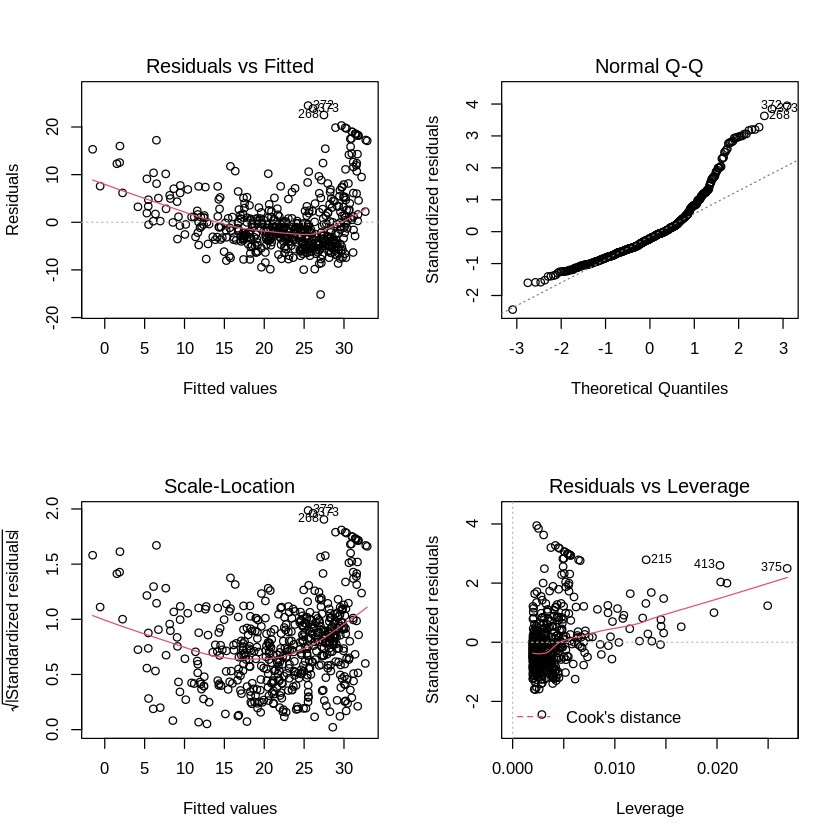

In [19]:
par(mfrow = c(2, 2))
plot(lm.fit)

We can also compute the residuals from a linear regression fit using the `residuals()` function, or the `rstudent()` function if we want the studentized residuals. Recall that the student residuals are computed by dividing each residual $e_i$ by its estimated standard error.

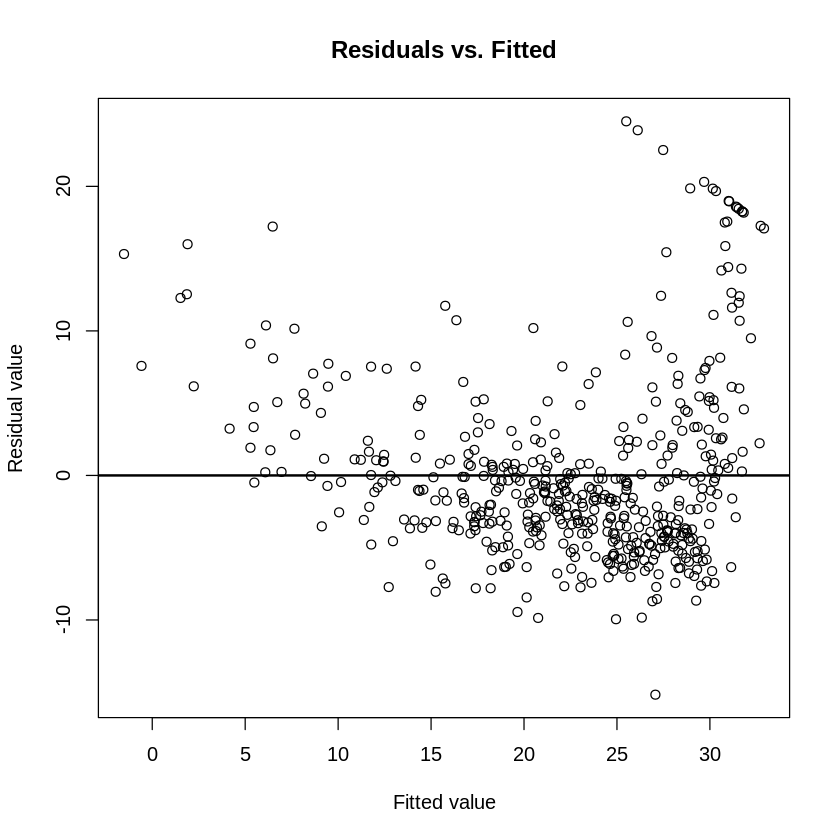

In [20]:
plot(predict(lm.fit), residuals(lm.fit), xlab = "Fitted value", ylab = "Residual value", main = "Residuals vs. Fitted")
abline(0, 0, lwd = 2)

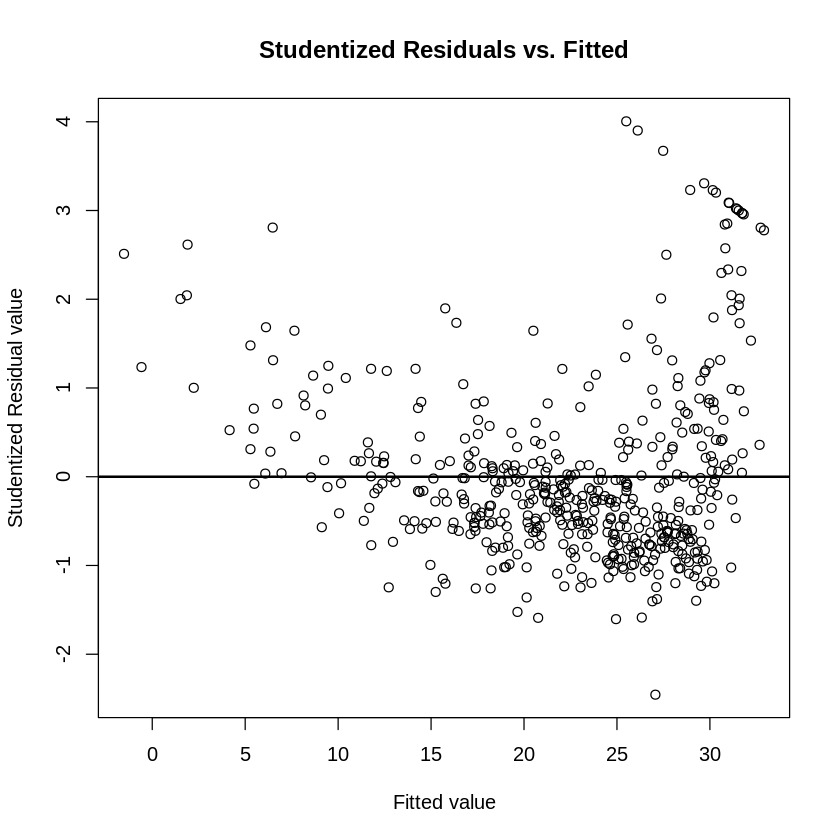

In [21]:
plot(predict(lm.fit), rstudent(lm.fit), xlab = "Fitted value", ylab = "Studentized Residual value", main = "Studentized Residuals vs. Fitted")
abline(0, 0, lwd = 2)

Looking at the residual plots gives further evidence of non-linearity -- there is a clear curved shape to the residuals.

If we wish, we can also compute leverage statistics using the `hatvalues()` function.

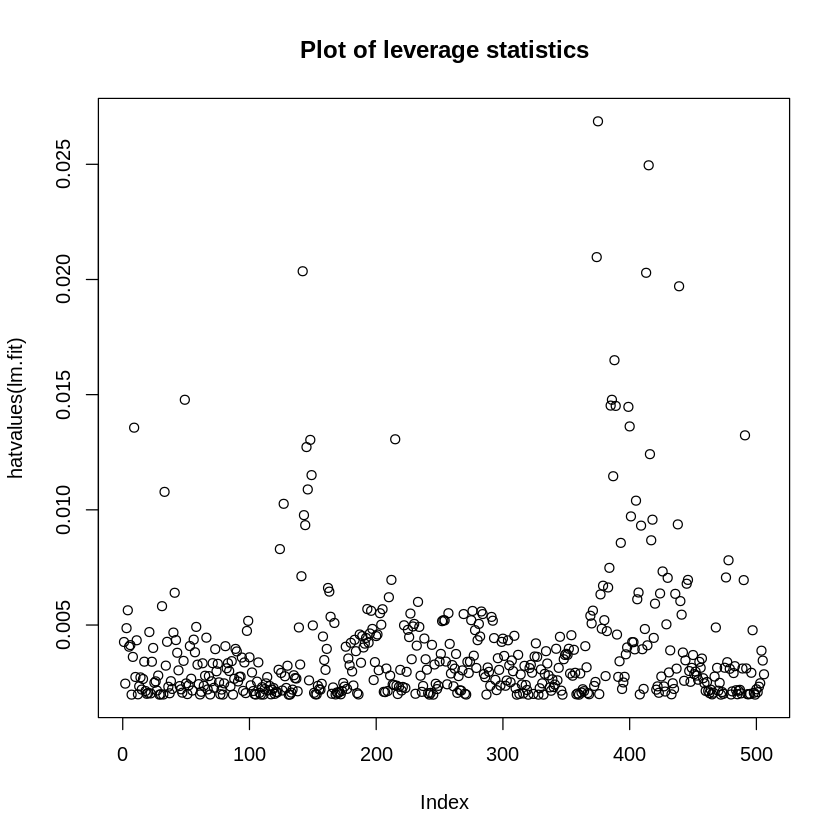

In [22]:
plot(hatvalues(lm.fit), main = "Plot of leverage statistics")

The `which.max()` function identifies the index of the largest element of a vector. In this case, we can use it to find out which observation has the largest leverage statistic.

In [23]:
which.max(hatvalues(lm.fit))

375 
375

## Multiple Linear Regression

To perform multiple linear regression using least squares, we again use the `lm()` function. This time, the syntax is `lm(y~x1+x2+...+xn)`, where we have $n$ predictors, $x_1, x_2, \dots, x_n$. This will give a linear regression function of the form $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n$. As before, we use the `summary()` function to information about the coefficients for each predictor.

In [24]:
lm.fit = lm(medv~lstat+age, data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


If we want to perform a regression using all of the predictors in a data set, we can use the short-hand `lm(y~., data = DataSet)`.

In [25]:
lm.fit = lm(medv~., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

If we wish to access individual components of a summary object, we can access they by name. The command `?summary.lm` shows what components are available to access. For example, `summary(lm.fit)$r.sq` gives us the value for $R^2$, while `summary(lm.fit)$sigma` gives us the residual standard error.

In [26]:
summary(lm.fit)$r.sq
summary(lm.fit)$sigma

[1] 0.7406427

[1] 4.745298

Some fancier statistics require loading other packages. For example, the `vif()` function from the `car` package can be used to compute variance inflation factors. Recall that if the `car` package isn't already installed, we can install it using the environment manager in Anaconda Navigator.

In [27]:
install.packages("car", repos='http://cran.us.r-project.org')
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData



In [28]:
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

Recall that the variance inflation factor for a predictor $X_j$ is the ratio of the variance of its coefficient $\hat{\beta}_j$ in the full model using divided by the variance of $\hat{\beta}_j$ in the model just using $X_j$. Variance inflation factors close to the minimum value of 1 indicate a small amount of collinearity, while values exceeding 5 or 10 are generally considered to indicate a problematic amount of collinearity. For this data, most of the variance inflation factors are low to moderate, though `rad` and `tax` stand out as having values on the high end.

In the multiple linear regression output, we see that `age` has a high p-value of 0.958, so we might want to exclude it. If we wish to perform regression with a small number of excluded variables, we have two options.  The first is to reuse the `lm()` function, while the other is to use the `update()` function.

In [29]:
lm.fit1 = lm(medv~.-age, data = Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

In [30]:
lm.fit1 = update(lm.fit, ~.-age)
lm.fit1


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Coefficients:
(Intercept)         crim           zn        indus         chas          nox  
  36.436927    -0.108006     0.046334     0.020562     2.689026   -17.713540  
         rm          dis          rad          tax      ptratio        black  
   3.814394    -1.478612     0.305786    -0.012329    -0.952211     0.009321  
      lstat  
  -0.523852  


## Interaction Terms

If we wish to include interaction terms in a linear regression model, we can use the syntax `lm(y~x1:x2)`, which tells `R` to include an interaction term between `x1` and `x2`. This would give us the regression function $y = \beta_0 + \beta_{12}x_1x_2$. If we want to include the individual variables themselves, as well as the interaction term between them, we can use `x1*x2`, which is a shorthand for `x1 + x2 + x1:x2`. Calling `lm(y~x1*x2)` would give us the regression function $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_{12}x_1x_2$.

In [31]:
summary(lm(medv~lstat*age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


## Non-linear transformations of the predictors

We can also use non-linear transformations of our variables in the `lm()` function. For example, we can create a predictor $X^2$ from the predictor $X$ using `I(X^2)`. Note that the function `I()` is necessary since the `^` has a special meaning in a formula. For example, we can perform a regression of `medv` onto `lstat` and `lstat^2`.

In [32]:
lm.fit2 = lm(medv~lstat+I(lstat^2), data = Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Since the quadratic term `lstat^2` has an extremely small p-value, we have evidence to believe that its inclusion leads to an improved model. To further quantify the extent to which the quadratic fit is superior to the linear fit, we can use the `anova()` function.

In [33]:
lm.fit = lm(medv~lstat, data = Boston)
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


The `anova()` function performs a hypothesis test comparing the two models. The null hypothesis is that both models fit the data equally well, while the alternative hypothesis is that the second model (in our case the model including the quadratic term) performs better. Here, we have an F-statistic of 135 and an p-value that is essentially zero, which provides strong evidence that the model containing the predictors `lstat` and `lstat^2` is a better fit than the one containing only `lstat`. This further confirms our initial suspicions based on the non-linearity we saw in the scatter plot for `medv` and `lstat`.

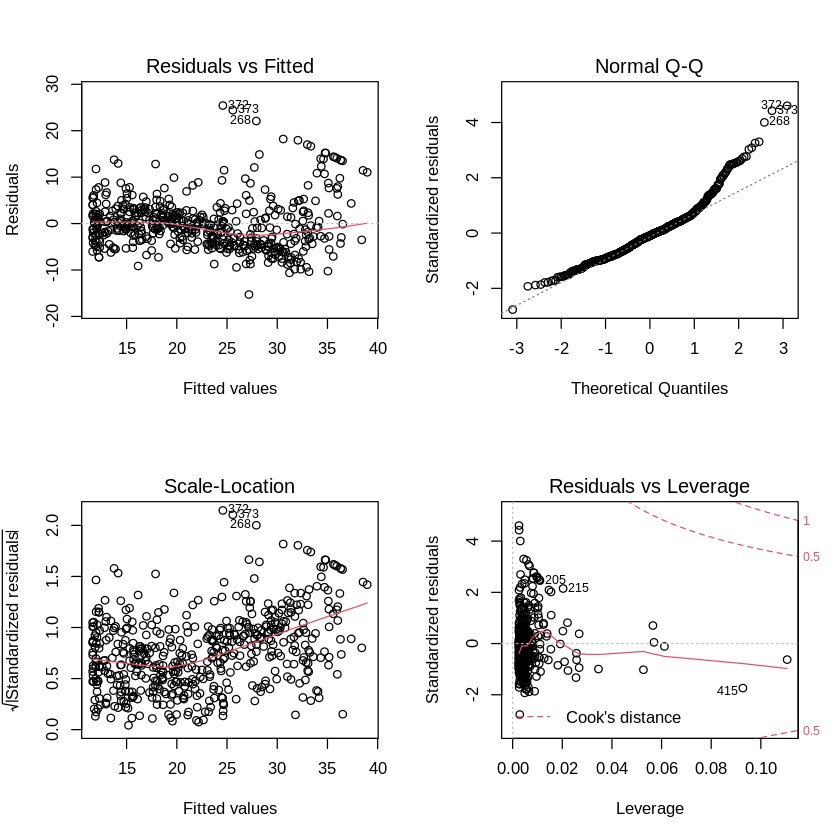

In [34]:
par(mfrow = c(2, 2))
plot(lm.fit2)

In addition, as we can see above, there isn't a discernible patter in the residuals for the model which includes the `lstat^2` term.

While we can include predictors of the form `I(X^k)` for higher order polynomial least-squares regression, it is more convenient to use the `poly()` function to create a polynomial within `lm()`. For example, we can produce a fifth-order polynomial fit.

In [35]:
lm.fit5 = lm(medv~poly(lstat, 5), data = Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This summary suggests that including additional polynomial terms further improves the model fit. Further investigation of the data indicates that polynomial terms beyond fifth order do not have significant p-values in a regression fit. One last thing to note is that we can use other non-linear transformations of the predictors. For example, we can do a logarithmic model.

In [36]:
summary(lm(medv~log(rm), data = Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


## Qualitative Predictors

Next we'll examine the `Carseats` data set from the `ISLR` library and attempt to predict `Sales` (child car seat sales) in 400 locations based on a number of predictors. To start with, we'll do our usual overview inspection of the data set and then check the names of the different predictors.

In [37]:
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [38]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

Also, so we can do this lab later in Python, we'll export the data to a CSV file using the `write.csv()` function. The basic syntax is `write.csv(myDataFrame, "File path for exporting\\FileName.csv")`. If you don't specify a file path, then by default the file will be created in the current working directory.

In [39]:
write.csv(Carseats, "Carseats.csv")

Looking at the data, we see that there are a number of qualitative predictors. For example, the `ShelveLoc` predictor is an indicator of the quality of the shelving location, or the space within a store in which the car seat is displayed, at each location. This predictor takes on three possible values: *Bad*, *Medium*, and *Good*. If we include a qualitative variable in `lm()`, `R` will automatically generate dummy variables for the possible values of that variable. Now we'll create a multiple regression model that also includes some interaction terms.

In [40]:
lm.fit = lm(Sales~.+Income:Advertising+Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

If we want to see the coding that `R` uses for the dummy variables, we can use the `contrasts()` function.

In [41]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Note that there are other options that we for contrasts that we can learn about by using the `?contrasts` command, as usual. Here we see that `R` created a dummy variable `ShelveLocGood` which is equal to 1 if the shelving location is good and 0 otherwise, along with a dummy variable `ShelveLocMedium` which is equal to 1 if the shelving location is medium and 0 otherwise. With this encoding, a bad shelving location corresponds to both dummy variables having a value of 0. The positive coefficients for `ShelveLocGood` and `ShelveLocMedium` in the regression output indicates that good or medium shelving locations contribute to higher sales compared to a bad location. The higher value of the coefficient for `ShelveLocGood` indicates that a good shelving location has leads to a bigger increase in sales (over a bad location) than a medium shelving location.

## Writing functions

We wrap up with a discussion on how to write our own functions in `R`. While there are many useful functions available in the base distribution of `R`, with even more available in various packages and libraries, we will often encounter situations where we'll need to write our own functions to perform tasks. For example, let's say we want to load a number of libraries all at once, using a single function `LoadLibraries()`. Before we have written such a function, attempting to call it will lead to an error.

In [42]:
regplot=function(x,y){
  fit=lm(y~x)
  plot(x,y)
  abline(fit,col="red")
}

In [43]:
attach(Carseats)

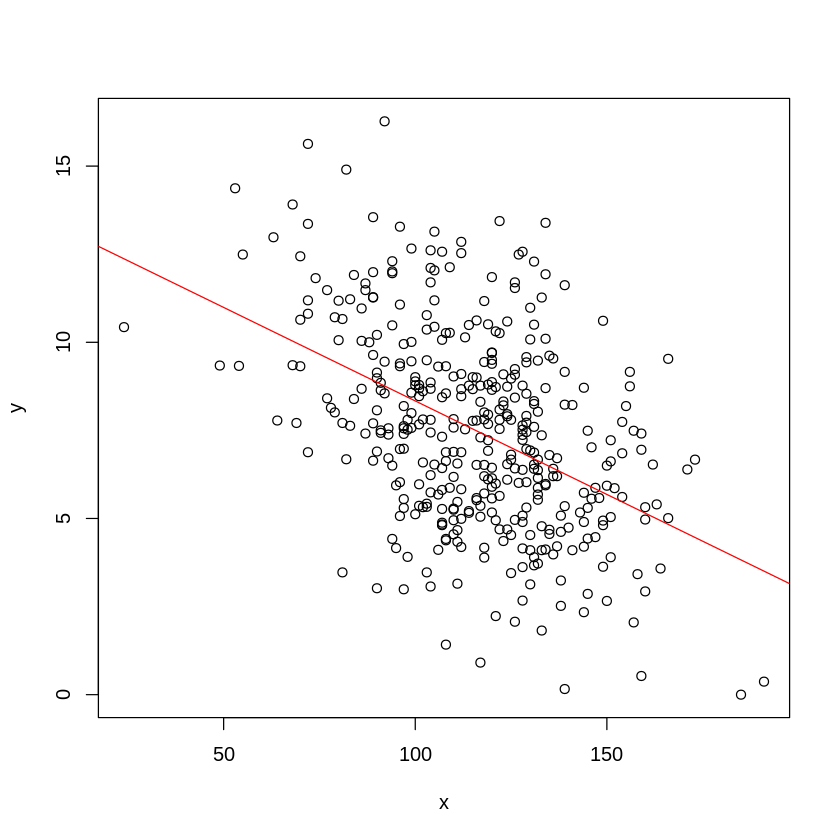

In [44]:
regplot(Price,Sales)

In [45]:
regplot=function(x,y,...){
  fit=lm(y~x)
  plot(x,y,...)
  abline(fit,col="red")
}

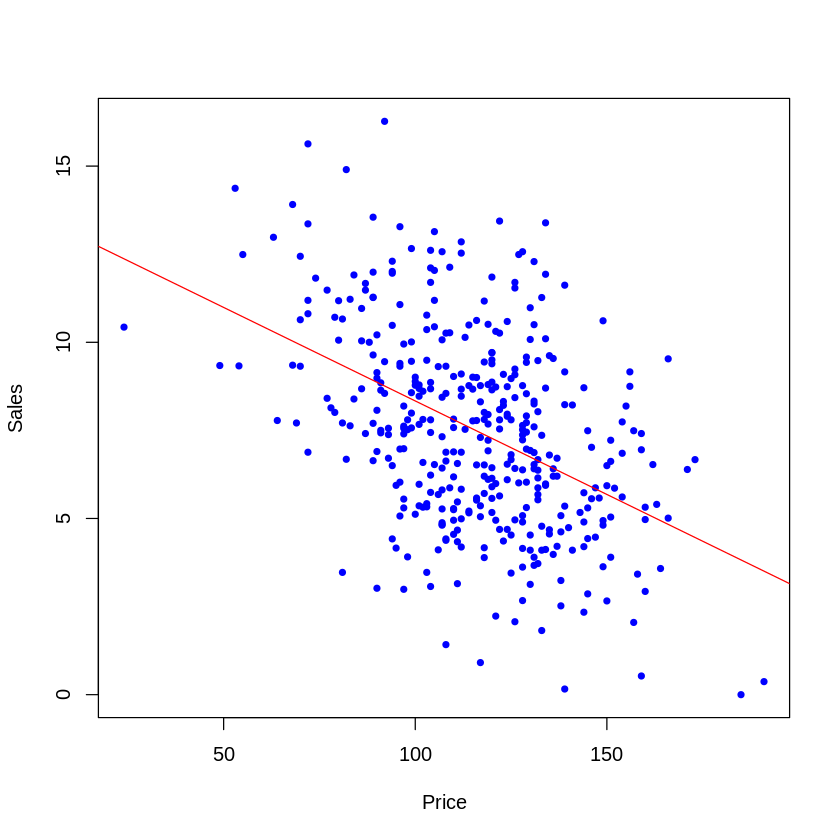

In [46]:
regplot(Price,Sales,xlab="Price",ylab="Sales",col="blue",pch=20)

In [48]:
#LoadLibraries()

Now let's write a function that loads the `ISLR` and `MASS` packages, and then on completion prints out a message telling us that the libraries have been successfully loaded.

In [49]:
LoadLibraries = function() {
    library(ISLR)
    library(MASS)
    print("The libraries have been loaded.")
}

Once we have written the function, it's now available for us to inspect and use. Just calling the function name, without parentheses, will return the source code for that function

In [50]:
LoadLibraries

function() {
    library(ISLR)
    library(MASS)
    print("The libraries have been loaded.")
}

If we wish to actually use the function, then we need to call it with parentheses, i.e. `LoadLibraries()`.

In [51]:
LoadLibraries()

[1] "The libraries have been loaded."


Reference: https://www.kaggle.com/suugaku/islr-lab-2-r/